# Titanic: a Machine Learning Case Study

![](titanic_main.png)

by Dr. Kristian Rother

*This tutorial is available under the conditions of the Creative Commons Attribution Share-alike License 4.0*

## Goal

We would like to utilize passenger data to predict whether or not they will survive a trip on the Titanic.

## Part 1: Boarding

![](boarding.png)

### 1.1 Importing Python Libraries
Import a few Python libraries typically used in Machine Learning:

In [1]:
import pandas as pd  # handling of tabular data
import numpy as np   # number crunching
import pylab as plt  # plotting

In [2]:
%matplotlib inline

### 1.2. Load passenger data

Use `pandas` to load the file `train.csv`.

In [3]:
df = pd.read_csv('train.csv')

You can find a detailed documentation of the dataset on [www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic).


### 1.3. Inspect the data

Show the contents of the pandas DataFrame.

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Challenge
Examine the distribution of values in two other columns of the dataset using the `value_counts()` function.

In [6]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Part 2: The Beauty of the Sea

![](journey.png)

### 2.1 Draw a histogram
Create a histogram grouping the passengers by age:

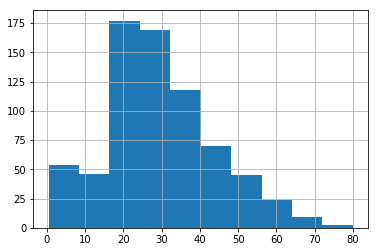

In [8]:
df['Age'].hist()

### Challenge
Explain the following line.

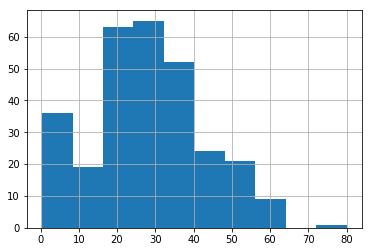

In [9]:
df[df['Survived']==1]['Age'].hist()

### 2.2 Bar plot

Create a bar plot that groups the passenger class by survival:

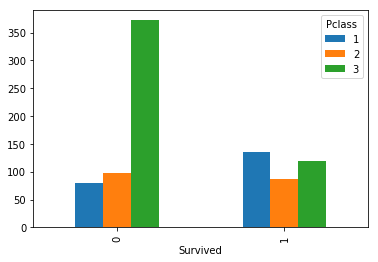

In [10]:
g = df.groupby(['Survived', 'Pclass'])
g = g['Name'].count()
g = g.unstack()
g.plot.bar()

### Challenge
Create another bar plot, this time group the bars by gender.

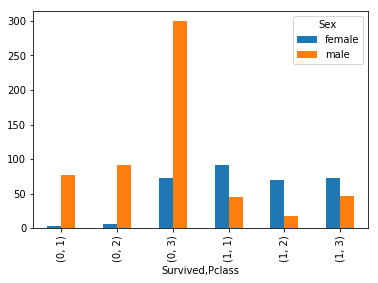

In [11]:
g = df.groupby(['Survived', 'Pclass', 'Sex'])
g = g['Name'].count()
g = g.unstack()
g.plot.bar()

### 2.3 Hypotheses
Collect ideas which **features** of passengers increase their chances of survival and which decrease them. Only after that start building a model.

**Observations:**

* children are more likely to survive
* passengers from class 1+2 are more likely to survive
* women are more likely to survive

## Part 3: Collision Course
![](titanic.png)

## 3.1 Data wrangling
At this point we need to clean and reshape the data a bit.

* Remove all columns but `"Pclass", "Age", "Sex" and "Survived"`.
* Remove all lines containing missing data.
* Convert all **input features** to a matrix `X`.
* Convert the **target column** to an 1D-array `y`.

In [12]:
cleaned = df[['Pclass', 'Age', 'Sex', 'Survived']]
cleaned = cleaned.dropna()

In [13]:
X = cleaned[['Pclass', 'Age']]
X = X.values

y = cleaned[['Survived']]
y = y.values.ravel()

### Challenge
View the dataset as a table before and after the data wrangling step.

In [14]:
X, y

(array([[  3.,  22.],
        [  1.,  38.],
        [  3.,  26.],
        ..., 
        [  1.,  19.],
        [  1.,  26.],
        [  3.,  32.]]),
 array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
     

### 3.2 Create a Training/Test set

Split the data into a training and a test set:

In [15]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [16]:
Xtrain.shape

(535, 2)

### Question
* Why do we need to create a separate test set?

**Answer:** To check our model on *independent* data.

## Part 4: Modeling and Prediction
![](sinking.png)

### 4.1 Build a logistic regression model
Create a Machine Learning model using logistic regression and fit it with the training data:

In [17]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()
m.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 4.2 Evaluate the model

Calculate the accuracy of the model for the training data:

In [18]:
m.score(Xtrain, ytrain)

0.69719626168224302

With a *skewed dataset*, a confusion matrix is more robust:

In [19]:
from sklearn.metrics import confusion_matrix

ypred = m.predict(Xtrain)
confusion_matrix(ytrain, ypred)

array([[266,  51],
       [111, 107]])

### Challenge
Calculate the accuracy for the test data as well. Explain the differences.

In [20]:
m.score(Xtest, ytest)

0.70949720670391059

### Question

Is this a good result? Why or why not?

**Answer:**

* 70% is better than a random coin toss 8505)
* 70% is only a bit better than always predicting "will not survive" (which gives 60% because the data is skewed)
* We still have a lot more data to use, so there is room for improvement!

### 4.3 More features
We will add more data to the prediction: gender. To use the data, we need to convert it to numbers using **one-hot encoding**. 

In [21]:
gender = pd.get_dummies(cleaned['Sex'])
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


Of course, we need to add the column to the input table (one is enough).

In [22]:
cleaned['female'] = gender['female']

### Challenge
Re-run the prediction above using the additional feature. How does the accuracy change?

In [23]:
X = cleaned[['Pclass', 'Age', 'female']]
X = X.values

y = cleaned[['Survived']]
y = y.values.ravel()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

m = LogisticRegression()
m.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
m.score(Xtrain, ytrain)

0.80186915887850463

In [25]:
m.score(Xtest, ytest)

0.78212290502793291

### 4.4 Try a Random Forest Model

Let's try a different model: The Random Forest (an **ensemble of decision trees**)

In [27]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier()

### Challenge
Fit the Random Forest model to the training data yourself and evaluate it on the test set.

In [28]:
m.fit(Xtrain, ytrain)
m.score(Xtrain, ytrain)

0.90654205607476634

In [30]:
m.score(Xtest, ytest)
# dramatic overfitting!

0.78212290502793291

Compare how the following parameters affect prediction quality:

In [ ]:
m1 = RandomForestClassifier(max_depth=2)
m2 = RandomForestClassifier(max_depth=3)
m3 = RandomForestClassifier(max_depth=10)

Limiting the complexity of a model is called **regularization**

In [33]:
m = RandomForestClassifier(max_depth=2)
m.fit(Xtrain, ytrain)
m.score(Xtrain, ytrain), m.score(Xtest, ytest)
# neither 2 or 3 is ideal, further tweaking will be necessary.

(0.80747663551401871, 0.76536312849162014)

## Part 5: Prediction

Create a data set for additional passengers and predict whether they will survive:

In [34]:
leo = np.array([[22, 3, 0]])
kate = np.array([[25, 1, 1]])

print(m.predict(leo))
print(m.predict(kate))

[0]
[1]


### Challenge
There is (at least) one error in the definition of the data for prediction. Can you find and fix it?

In [36]:
# swapped order of values, hard to spot.
leo = np.array([[3, 22, 0]])
kate = np.array([[1, 25, 1]])

print(m.predict(leo))
print(m.predict(kate))

[0]
[1]
